# Introduction to Machine Learning in Python
<img src="figures/Pic_BP_PDF-02.png" style="max-width:100%; width: 80%; max-width: none">

**What is Machine Learning?**

Machine learning is the process to automatically extract knowledge from data, usually with the goal of making predictions on new, unseen data. A classical example is a spam filter, for which the user keeps labeling incoming mails as either spam or not spam. A machine learning algorithm then "learns" what distinguishes spam from normal emails, and can predict for new emails whether they are spam or not.

<img src="figures/supervised_workflow.svg" width="80%">

## Machine Learning can be broadly classified into two(okay three) classes:

* Supervised
* Unsupervised
* Reinforcement

For the sake of this workshop, we will be dealing with the first two only.

<img src="figures/Pic_BP_PDF-11.png" width="70%">

### Supervised Learning: Classification and regression

In **Supervised Learning**, we have a dataset consisting of both input features and a desired output, such as in the spam / no-spam example.
The task is to construct a model (or program) which is able to predict the desired output of an unseen object
given the set of features.

Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like.
- given a persons age, education and position, infer their salary

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, such as "spam" or "no spam". In other words, it provides a clear-cut distinction between categories. In regression, the label is continuous, that is a float output. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

In supervised learning, there is always a distinction between a **training set** for which the desired outcome is given, and a **test set** for which the desired outcome needs to be inferred.


### Unsupervised Learning

In **Unsupervised Learning** there is no desired output associated with the data.
Instead, we are interested in extracting some form of knowledge or model from the given data.
In a sense, you can think of unsupervised learning as a means of discovering labels from the data itself.
Unsupervised learning is often harder to understand and to evaluate.

Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*density estimation*. For example, in the iris data discussed above, we can used unsupervised
methods to determine combinations of the measurements which best display the structure of the
data. As we’ll see below, such a projection of the data can be used to visualize the
four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:

- given detailed observations of distant galaxies, determine which features or combinations of
  features summarize best the information.
- given a mixture of two sound sources (for example, a person talking over some music),
  separate the two (this is called the [blind source separation](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
- given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.
- given a large collection of news articles, find recurring topics inside these articles.
- given a collection of images, cluster similar images together (for example to group them when visualizing a collection)

Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful
features in heterogeneous data, and then these features can be used within a supervised
framework.

# Representation and Visualization of Data

## Data in scikit-learn

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of size `[n_samples, n_features]`. 

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample.

Each sample (data point) is a row in the data array, and each feature is a column.

### A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.  There are three species of iris
in the dataset, which we can picture here:

Iris Setosa

<img src="figures/iris_setosa.jpg" width="30%">

Iris Versicolor
<img src="figures/iris_versicolor.jpg" width="30%">

Iris Virginica
<img src="figures/iris_virginica.jpg" width="30%">


### Quick Question:
**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

<img src="figures/petal_sepal.jpg" alt="Sepal" style="width: 50%;"/>


In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [3]:
n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

150
4
[ 5.1  3.5  1.4  0.2]


In [4]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

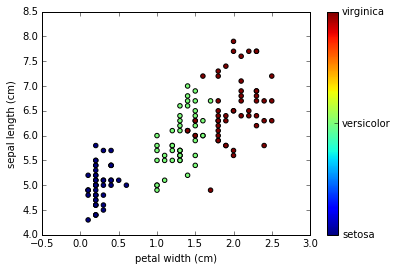

In [8]:
x_index = 3
y_index = 0

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

## Other Available Data

Scikit-learn makes available a host of datasets for testing learning algorithms.
They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    datasets.load_<TAB>

or

    datasets.fetch_<TAB>

or

    datasets.make_<TAB>

to see a list of available functions.

In [9]:
from sklearn import datasets

The data downloaded using the ``fetch_`` scripts are stored locally,
within a subdirectory of your home directory.
You can use the following to determine where it is:


In [10]:
from sklearn.datasets import get_data_home
get_data_home()

'/home/dell/scikit_learn_data'

### Quick Excercise
Load and play with the **digits dataset**

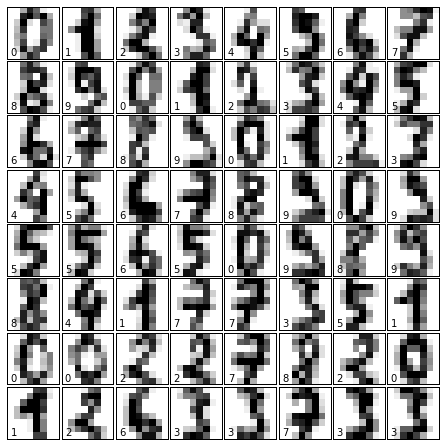

In [11]:
# %load scripts/plot_digits.py
# set up the figure
from sklearn.datasets import load_digits
digits = load_digits()
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))


Training and Testing Data
=====================================
To evaluate how well our supervised models generalize, we can split our data into a training and a test set:

<img src="figures/train_test_split.svg" width="100%">


In [12]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
import numpy as np
rng = np.random.RandomState(0)

permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
print(y)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1
 2 0]


In [15]:
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=1999)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
[0 1 1 2 2 2 0 2 2 1 1 2 2 1 1 1 1 1 0 2 2 2 1 0 2 1 1 2 1 0 2 2 0 2 2 0 2
 1 0 2 0 2 2 2 0 2 0 0 1 0 1 0 2 1 1 0 1 2 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 2]
[1 0 1 2 2 1 1 0 1 0 0 2 2 2 1 0 2 0 2 1 0 0 0 2 1 1 1 1 1 0 2 2 2 2 0 1 0
 1 2 1 2 2 1 2 2 1 0 2 0 2 1 2 0 0 2 0 2 1 2 1 0 1 0 1 0 2 2 0 0 0 1 0 1 0
 1]


In [16]:
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)
print("Fraction Correct")
print(np.sum(pred_y == test_y) / float(len(test_y)))

Fraction Correct
0.96


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 25
 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 73 74]
[24 38 72]


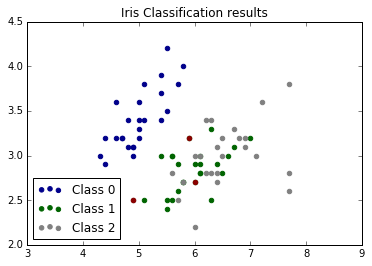

In [18]:
# Plot two dimensions
colors = ["darkblue", "darkgreen", "gray"]
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 0], test_X[idx, 1], color=color, label="Class %s" % str(n))
plt.scatter(test_X[incorrect_idx, 0], test_X[incorrect_idx, 1], color="darkred")
# Make xlim larger to accommodate legend
plt.xlim(3, 9)
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()

# Underlying Principles of Scikit-Learn


After briefly introducing scikit-learn's *Estimator* object, we'll cover **supervised learning**, including *classification* and *regression* problems, and **unsupervised learning**, including *dimensinoality reduction* and *clustering* problems.

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()

## The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is implemented as so:

In [20]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [21]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [22]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [23]:
x = np.arange(10)
y = 2 * x + 1

In [24]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


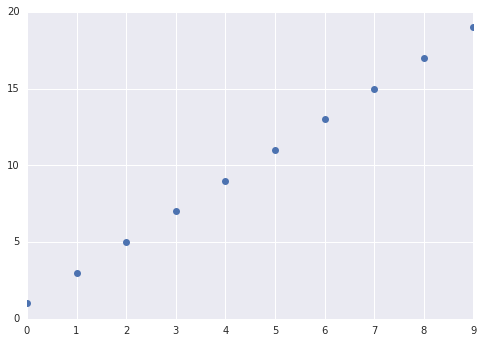

In [25]:
plt.plot(x, y, 'o');

In [26]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [27]:
# fit the model on our data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [29]:
model.coef_

array([ 2.])

In [43]:
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[ 2.]
1.0


In [44]:
# residual error around fit
model.residues_

/home/dell/anaconda2/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


7.6200430943719212e-31